# Predicting heart disease using machine learning by GOVIND

In [1]:
# import libraries

#Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [39]:
#Load Data

df=pd.read_csv("heart disease classification dataset.csv")
print(df.shape)
df.head()

(303, 15)


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


<AxesSubplot:>

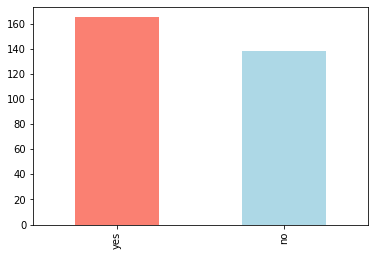

In [40]:
df['target'].value_counts().plot(kind='bar' , color=['salmon','lightblue'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [42]:
df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [43]:
avg_trestbps=df['trestbps'].mean()
avg_chol=df['chol'].mean()
avg_thalach=df['thalach'].mean()

df['trestbps'].fillna(avg_trestbps,inplace=True)
df['chol'].fillna(avg_chol,inplace=True)
df['thalach'].fillna(avg_thalach,inplace=True)

df=df.drop('Unnamed: 0',axis=1)

In [45]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [47]:
df['sex']=df['sex'].map({'male':1,'female':0})
df['target']=df['target'].map({'yes':1,'no':0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

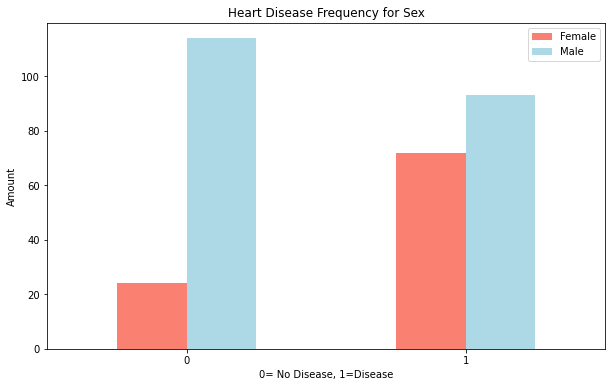

In [48]:
#Heart Disease Frequency according to Sex

crosstab=pd.crosstab(df.target,df.sex)

crosstab.plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0= No Disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

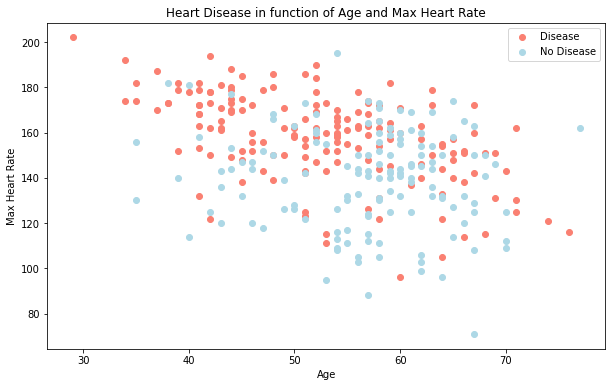

In [49]:
#Age vs Max Heart rate for Heart Disease

plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

(14.5, -0.5)

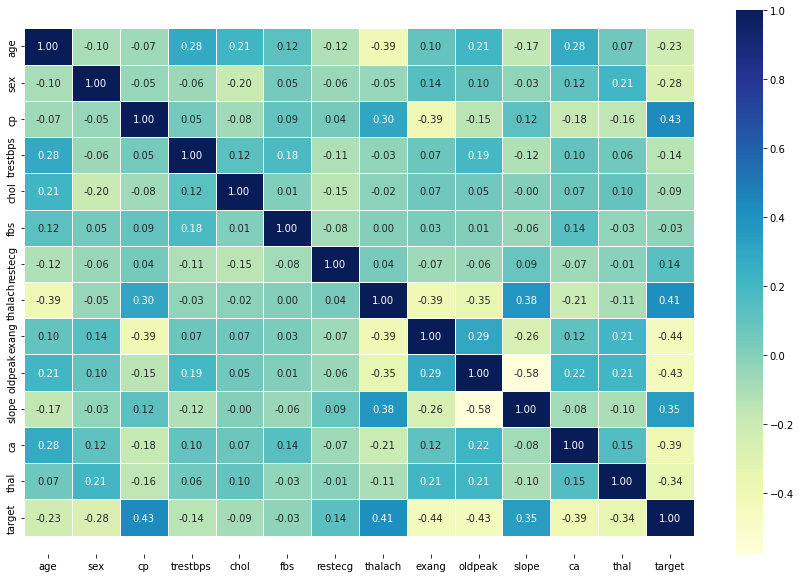

In [51]:
#Correlation Matrix

corr_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [63]:
#Modeling

X=df.drop('target',axis=1)
y=df['target']

In [64]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

In [71]:
models ={'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    model_scores={}
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [72]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

c:\Users\91876\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.7868852459016393}

<AxesSubplot:>

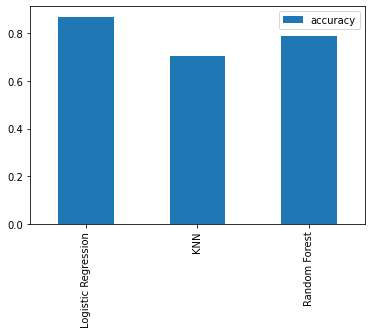

In [74]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

Model Improvement

In [80]:
#Lets tune KNN

train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    
    

In [79]:
print(train_scores)
print(test_scores)

[1.0, 0.7975206611570248, 0.78099173553719, 0.7479338842975206, 0.7768595041322314, 0.7768595041322314, 0.743801652892562, 0.743801652892562, 0.7231404958677686, 0.7066115702479339, 0.7272727272727273, 0.7024793388429752, 0.71900826446281, 0.7148760330578512, 0.7024793388429752, 0.71900826446281, 0.6983471074380165, 0.7148760330578512, 0.71900826446281, 0.7107438016528925]
[0.5901639344262295, 0.5901639344262295, 0.7049180327868853, 0.6557377049180327, 0.7049180327868853, 0.639344262295082, 0.6557377049180327, 0.6065573770491803, 0.6229508196721312, 0.6721311475409836, 0.6557377049180327, 0.6557377049180327, 0.639344262295082, 0.6557377049180327, 0.7049180327868853, 0.7049180327868853, 0.6885245901639344, 0.6557377049180327, 0.6885245901639344, 0.6721311475409836]


Maximum KNN score on the test data: 70.49%


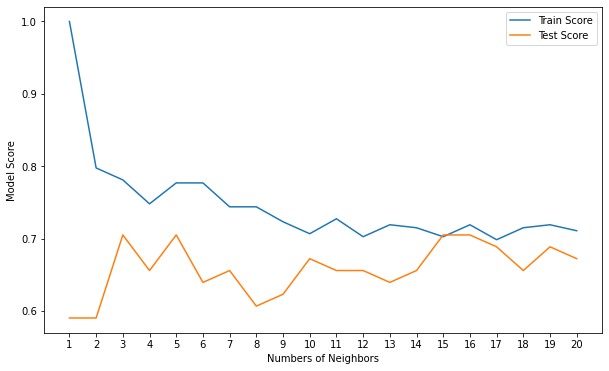

In [81]:
#Visualization

plt.figure(figsize=(10,6))
plt.plot(neighbors,train_scores, label='Train Score')
plt.plot(neighbors,test_scores, label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Numbers of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Since our LogisticRegression model provides the best scores so far, we’ll try and improve them again using GridSearchCV…

In [84]:
#diffentiate parameters of our log.reg.model

log_reg_grid ={'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [85]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [86]:
gs_log_reg.score(x_test,y_test)

0.8688524590163934

Confusion Matrix

In [91]:
lr=LogisticRegression().fit(x_train,y_train)

y_preds=lr.predict(x_test)
y_preds

c:\Users\91876\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [92]:
print(confusion_matrix(y_test, y_preds))

[[13  6]
 [ 2 40]]


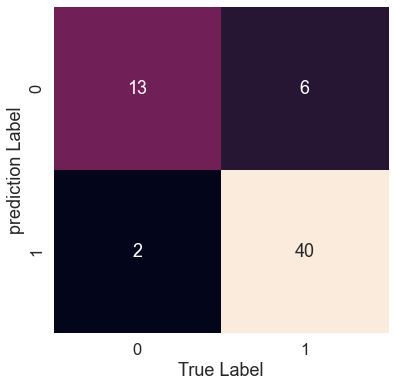

In [97]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('prediction Label')
    
plot_conf_mat(y_test,y_preds)